In [1]:
import os.path
import glob
import csv
import gzip
from collections import namedtuple, defaultdict, Counter
from typing import Tuple, Set, Dict
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

FIELDS = ["sentence", "label", "probs"]
Sentence = namedtuple("Sentence", FIELDS)
Results = namedtuple("Results", ["category", "model", "data", "total_positives", "total_negatives"])

def reader(filepath: str) -> Tuple[str, str, Dict[str, Set[str]],]:
    basename = os.path.basename(filepath)
    category, model, *_run_data = basename.split(".")
    data = {"positive": set(), "negative": set()}
    with gzip.open(filepath, mode="rt") as f:
        reader = csv.DictReader(f)
        poss, negs = 0, 0
        for row in reader:
            if row["label"] == "positive":
                poss += 1
            else:
                negs += 1
            if row["ok"] != "True":
                data[row["label"]].add(Sentence(
                    **{k:v for k, v in row.items() if k in FIELDS}
                ))
    return Results(category, model, data, poss, negs)

def get_serie(valeurs, maximum_value):
    cnter = Counter([min(v, maximum_value) for v in valeurs.values()])
    return pd.Series(
        {key: cnter.get(key, 0) for key in range(0, maximum_value+1)}
    ).sort_index()

# Parse

In [8]:
ALL = defaultdict(lambda: defaultdict(list))
ALL_RUNS = defaultdict(lambda: Counter())
for file in glob.glob("./test_dumps/main*.csv.gz"):
    res = reader(file)
    if "Enriched" not in file:
        ALL["NotEnriched"+res.category][res.model].append(res)
        ALL_RUNS["NotEnriched"+res.category][res.model] += 1
    ALL[res.category][res.model].append(res)
    ALL_RUNS[res.category][res.model] += 1

# Analyze

Positives that are never recognized: 23.51% (59) of all positives; 32.42% of all unique errors (182) in positives
Negatives that are never recognized: 0.20% (5) of all negatives; 3.97% of all unique errors (126) in negatives


Positives that are never recognized: 17.13% (43) of all positives; 35.54% of all unique errors (121) in positives
Negatives that are never recognized: 0.32% (8) of all negatives; 9.52% of all unique errors (84) in negatives


Positives that are never recognized: 14.74% (37) of all positives; 33.04% of all unique errors (112) in positives
Negatives that are never recognized: 0.36% (9) of all negatives; 8.82% of all unique errors (102) in negatives


Positives that are never recognized: 13.55% (34) of all positives; 26.77% of all unique errors (127) in positives
Negatives that are never recognized: 0.20% (5) of all negatives; 3.79% of all unique errors (132) in negatives


Positives that are never recognized: 22.71% (57) of all positives; 29.38% of all unique errors (194) in positives
Negatives that are never recognized: 0.20% (5) of all negatives; 5.62% of all unique errors (89) in negatives


Positives that are never recognized: 13.15% (33) of all positives; 26.40% of all unique errors (125) in positives
Negatives that are never recognized: 0.28% (7) of all negatives; 6.80% of all unique errors (103) in negatives


Positives that are never recognized: 15.14% (38) of all positives; 28.79% of all unique errors (132) in positives
Negatives that are never recognized: 0.20% (5) of all negatives; 3.68% of all unique errors (136) in negatives


Positives that are never recognized: 13.15% (33) of all positives; 24.44% of all unique errors (135) in positives
Negatives that are never recognized: 0.24% (6) of all negatives; 5.45% of all unique errors (110) in negatives


Counter({'AggloMSD-CNN-None-Word2Vec-128': 10, 'AggloMSD-HAN-None-Word2Vec-256': 10, 'AggloMSD-HAN-None-Word2Vec-128': 10, 'AggloMSD-LSTM-None-Word2Vec-128': 10, 'AggloMSD-CNN-None-Word2Vec-256': 10, 'AggloMSD-GRU-None-Word2Vec-128': 10, 'AggloMSD-LSTM-None-Word2Vec-256': 10, 'AggloMSD-GRU-None-Word2Vec-256': 10})
max 80
Positives that are never recognized: 7.57% (19) of all positives; 9.09% of all unique errors (209) in positives
Negatives that are never recognized: 0.00% (0) of all negatives; 0.00% of all unique errors (273) in negatives


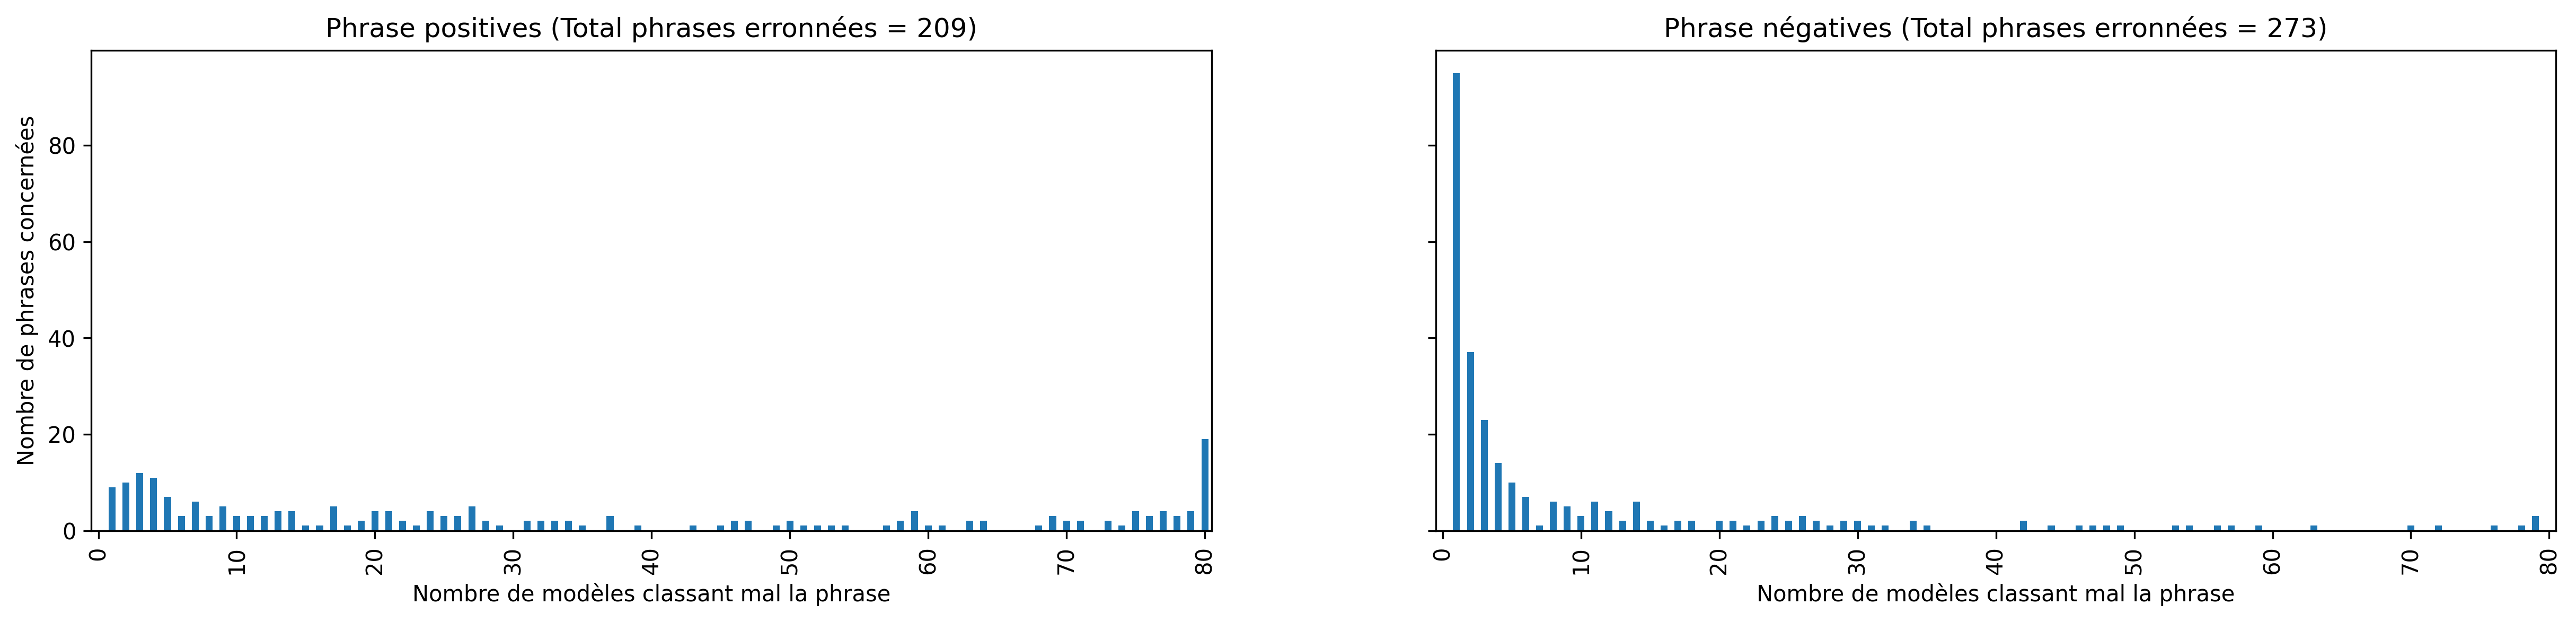

Positives that are never recognized: 23.51% (59) of all positives; 32.42% of all unique errors (182) in positives
Negatives that are never recognized: 0.20% (5) of all negatives; 3.97% of all unique errors (126) in negatives


Positives that are never recognized: 17.13% (43) of all positives; 35.54% of all unique errors (121) in positives
Negatives that are never recognized: 0.32% (8) of all negatives; 9.52% of all unique errors (84) in negatives


Positives that are never recognized: 12.35% (31) of all positives; 28.44% of all unique errors (109) in positives
Negatives that are never recognized: 0.28% (7) of all negatives; 8.54% of all unique errors (82) in negatives


Positives that are never recognized: 14.74% (37) of all positives; 33.04% of all unique errors (112) in positives
Negatives that are never recognized: 0.36% (9) of all negatives; 8.82% of all unique errors (102) in negatives


Positives that are never recognized: 11.16% (28) of all positives; 23.33% of all unique errors (120) in positives
Negatives that are never recognized: 0.24% (6) of all negatives; 6.00% of all unique errors (100) in negatives


Positives that are never recognized: 10.76% (27) of all positives; 25.23% of all unique errors (107) in positives
Negatives that are never recognized: 0.32% (8) of all negatives; 7.27% of all unique errors (110) in negatives


Positives that are never recognized: 13.55% (34) of all positives; 26.77% of all unique errors (127) in positives
Negatives that are never recognized: 0.20% (5) of all negatives; 3.79% of all unique errors (132) in negatives


Positives that are never recognized: 22.71% (57) of all positives; 29.38% of all unique errors (194) in positives
Negatives that are never recognized: 0.20% (5) of all negatives; 5.62% of all unique errors (89) in negatives


Positives that are never recognized: 13.15% (33) of all positives; 26.40% of all unique errors (125) in positives
Negatives that are never recognized: 0.28% (7) of all negatives; 6.80% of all unique errors (103) in negatives


Positives that are never recognized: 15.14% (38) of all positives; 28.79% of all unique errors (132) in positives
Negatives that are never recognized: 0.20% (5) of all negatives; 3.68% of all unique errors (136) in negatives


Positives that are never recognized: 13.15% (33) of all positives; 24.44% of all unique errors (135) in positives
Negatives that are never recognized: 0.24% (6) of all negatives; 5.45% of all unique errors (110) in negatives


Positives that are never recognized: 10.76% (27) of all positives; 25.71% of all unique errors (105) in positives
Negatives that are never recognized: 0.32% (8) of all negatives; 7.69% of all unique errors (104) in negatives


Counter({'AggloMSD-CNN-None-Word2Vec-128': 10, 'AggloMSD-HAN-None-Word2Vec-256': 10, 'NoMorph-HAN-LinearEnriched-Word2Vec-128': 10, 'AggloMSD-HAN-None-Word2Vec-128': 10, 'AggloMSD-LSTM-LSTMEnriched-Word2Vec-128': 10, 'NoMorph-LSTM-LSTMEnriched-Word2Vec-256': 10, 'AggloMSD-LSTM-None-Word2Vec-128': 10, 'AggloMSD-CNN-None-Word2Vec-256': 10, 'AggloMSD-GRU-None-Word2Vec-128': 10, 'AggloMSD-LSTM-None-Word2Vec-256': 10, 'AggloMSD-GRU-None-Word2Vec-256': 10, 'AggloMSD-HAN-LinearEnriched-Word2Vec-256': 10})
max 120
Positives that are never recognized: 3.59% (9) of all positives; 4.17% of all unique errors (216) in positives
Negatives that are never recognized: 0.00% (0) of all negatives; 0.00% of all unique errors (330) in negatives


<Figure size 432x288 with 0 Axes>

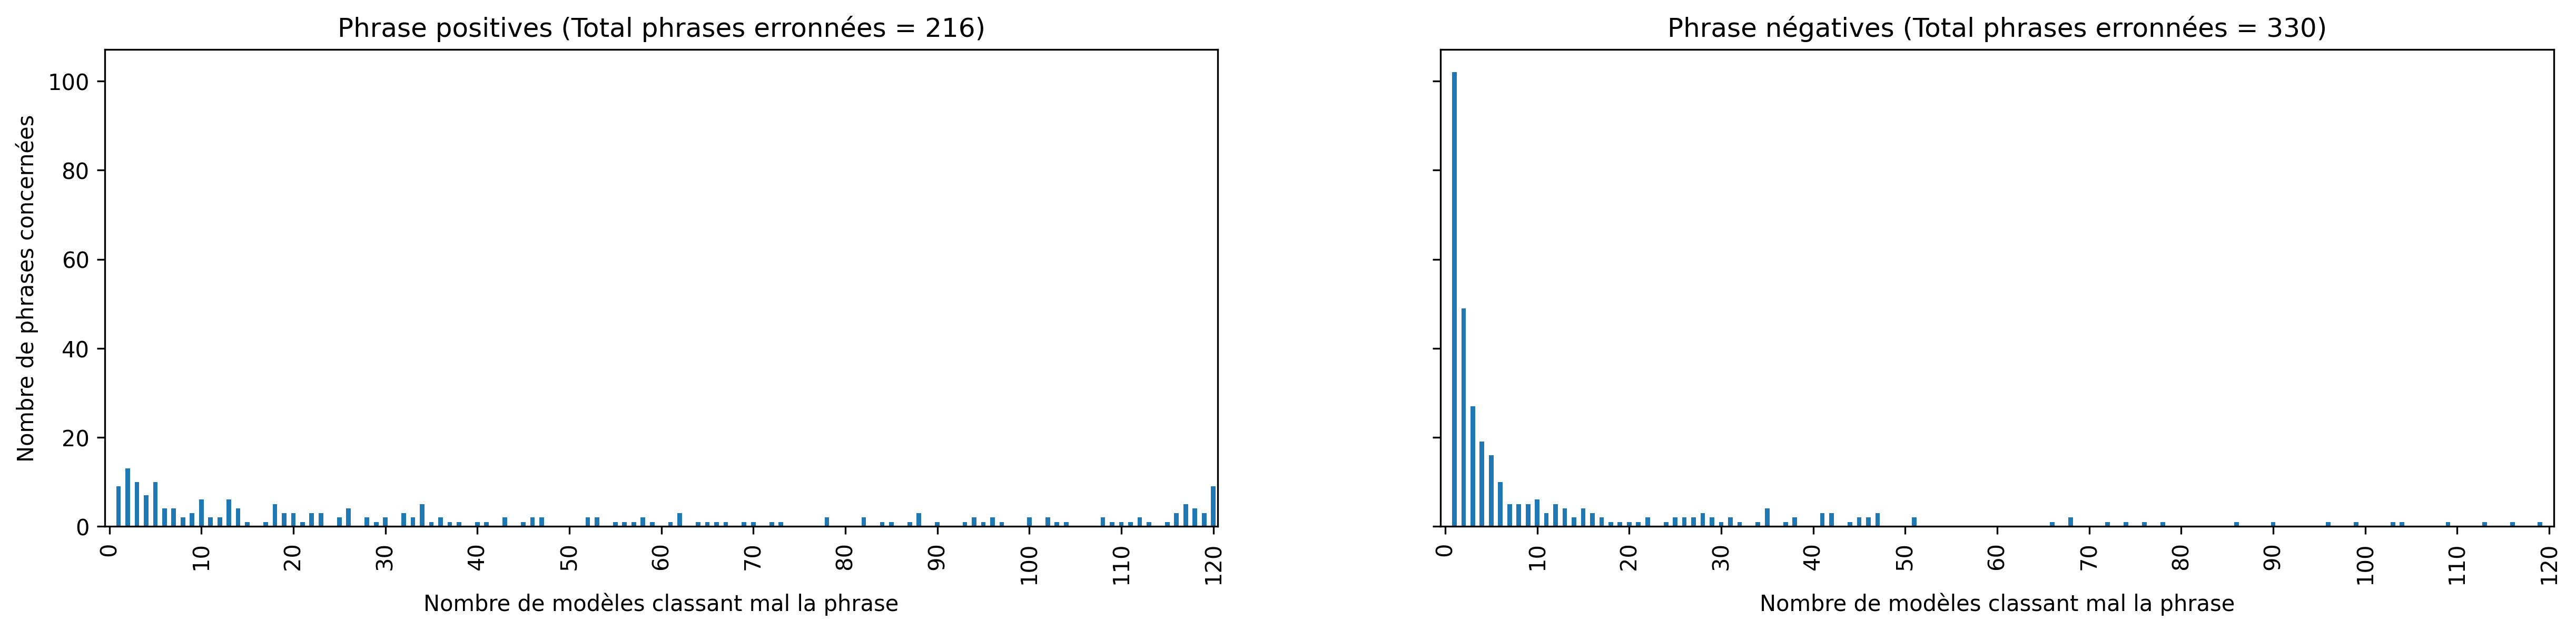

<Figure size 432x288 with 0 Axes>

In [20]:
from IPython.core.display import display, HTML 

DO_PLOT = False
DO_PLOT_ALL = True

nice_dfs = {}

for category in ALL:
    display(HTML(f"<h3>{category.capitalize()}</h3>"))
    
    # Phrase > Nombre de fois mal classée
    all_positives = Counter()
    all_negatives = Counter()
    for model in ALL[category]:
        display(HTML(f"<h4>{model}</h4>"))
        # Pour chacun des modèles dans la catégorie, on compte le nombre de fois où la phrase est apparue
        positives = Counter([
            sentence.sentence
            for results in ALL[category][model]
            for sentence in results.data["positive"]
        ])
        negatives = Counter([
            sentence.sentence
            for results in ALL[category][model]
            for sentence in results.data["negative"]
        ])
        # Mise à jour des compteurs globaux
        all_positives.update(positives)
        all_negatives.update(negatives)
        
        # Nombre de fois où le modèle est testé !
        _max = ALL_RUNS[category][model]
        
        always_pos = [sent for sent in positives if positives[sent] >= _max]
        always_neg = [sent for sent in negatives if negatives[sent] >= _max]
        print(f"Positives that are never recognized: "
              f"{100*len(always_pos)/ALL[category][model][-1].total_positives:.2f}% ({len(always_pos)}) of all positives; "
              f"{100*len(always_pos)/len(positives):.2f}% of all unique errors ({len(positives)}) in positives")
        print(f"Negatives that are never recognized: "
              f"{100*len(always_neg)/ALL[category][model][-1].total_negatives:.2f}% ({len(always_neg)}) of all negatives; "
              f"{100*len(always_neg)/len(negatives):.2f}% of all unique errors ({len(negatives)}) in negatives")
        #print("\n".join([f"\t{sent}" for sent in always_pos])) 
        if DO_PLOT:
            ax = pd.Series(Counter(positives.values())).sort_index().plot.bar()
            ax.set_xlabel("Nombre de modèle faisant l'erreur")
            ax.set_ylabel("Nombre de phrases concernées")
            ax.set_title("Répartition des phrases positives mal reconnues par nombre de \n modèles ne les reconnaissant pas sur 10 itérations ")
            plot.show()
            plot.clf()
            ax = pd.Series(Counter(negatives.values())).sort_index().plot.bar()
            ax.set_xlabel("Nombre de modèle faisant l'erreur")
            ax.set_ylabel("Nombre de phrases concernées")
            ax.set_title("Répartition des phrases négatives mal reconnues par nombre de \n modèles ne les reconnaissant pas sur 10 itérations ")
            plot.show()
            plot.clf()
            
    display(HTML("<h4>Over all models</h4>"))
    
    # Nombre d'entraînements
    _max = sum(ALL_RUNS[category].values())
    print(ALL_RUNS[category])
    print("max", _max)
    
    always_pos = [sent for sent in all_positives if all_positives[sent] >= _max]
    always_neg = [sent for sent in all_negatives if all_negatives[sent] >= _max]
    print(f"Positives that are never recognized: "
          f"{100*len(always_pos)/ALL[category][model][-1].total_positives:.2f}% ({len(always_pos)}) of all positives; "
          f"{100*len(always_pos)/len(all_positives):.2f}% of all unique errors ({len(all_positives)}) in positives")
    print(f"Negatives that are never recognized: "
          f"{100*len(always_neg)/ALL[category][model][-1].total_negatives:.2f}% ({len(always_neg)}) of all negatives; "
          f"{100*len(always_neg)/len(all_negatives):.2f}% of all unique errors ({len(all_negatives)}) in negatives")
    
    if DO_PLOT_ALL:
        fig, (ax1, ax2) = plot.subplots(1, 2, figsize=(20, 4), dpi=300, sharey=True)
        fig.patch.set_facecolor('white')
        ldf = get_serie(all_positives, _max)
        ldf.plot.bar(ax=ax1)
        ax1.set_xlabel("Nombre de modèles classant mal la phrase")
        ax1.set_ylabel("Nombre de phrases concernées")
        ax1.set_title(f"Phrase positives (Total phrases erronnées = {ldf.sum()})")
        
        ticks = list(np.arange(0, _max+1, 10))        
        ax1.set_xticks(ticks)
        ax1.set_xticklabels(ticks)
        
        
        ldf = get_serie(all_negatives, _max)
        ldf.plot.bar(ax=ax2)
        ax2.set_xlabel("Nombre de modèles classant mal la phrase")
        ax2.set_ylabel("Nombre de phrases concernées")
        ax2.set_title(f"Phrase négatives (Total phrases erronnées = {ldf.sum()})")        

        ticks = list(np.arange(0, _max+1, 10))        
        ax2.set_xticks(ticks)
        ax2.set_xticklabels(ticks)
        #ax1.set_yticks()
        plot.show()
        plot.clf()
    
    nice_dfs[category] = pd.DataFrame([[key, value] for (key, value) in all_positives.items()], columns=["Phrase", "FalseRatio"])

In [4]:
df = pd.DataFrame([[key, value, value==120] for (key, value) in all_positives.items()], columns=["Phrase", "FalseRatio", "All"])

In [22]:
nice_dfs.keys()
pd.set_option('display.max_colwidth', None)

for key in nice_dfs:
    df = nice_dfs[key]
    print("=======\n\n\n")
    print(key)
    print(df[df.FalseRatio > (.95 * int(df.FalseRatio.nlargest(2).iloc[1]))].sort_values("FalseRatio").to_csv())




NotEnrichedmain
,Phrase,FalseRatio
4,"Cur non , quia bellissima occasio est , devirginatur Pannychis nostra ?",77
75,"uae striges comederunt nervos tuos , aut quod purgamentum in nocte calcasti in trivio aut cadaver ?",77
31,Ceres facibus accensis et serpente circumdata errore subreptam et corruptam Liberam anxia et sollicita uestigat : haec sunt Eleusinia .,77
112,"Alius fauces invadit , alius os verberat , alius pectus et ventrem , atque etiam foedum dictu verenda contundit ;",77
85,misit circum fora et basilicas nomenculatores ad inuitandos ad libidinem iuuenes senesque -que ;,78
5,sic se tibi misceat !,78
57,"nunc tu si vis subigitare me , probast est occasio .",78
43,"Quid ego tibi deliqui , si , cui nupta sum , tecum -cum fui ?",79
86,"Utcunque igitur inter anhelitus sudoresque -que tritus , quod voluerat , accepit , rursusque -que in somnum decidi gaudio lassus .",79
26,Num mea Thessalico languent devota veneno Corpora ?,79
40,"Tanta est quae Titio columna pendet , Quantam La